Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T10', #tinker et al 2010 @ M200m
}



# tsz power spectrum - Arnaud et al 2010

In [4]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.53, #hydrostatic equilibrium bias (1-b)^-1
        })
        
M.compute()
cl_sz = M.cl_sz()
M.struct_cleanup()
M.empty()

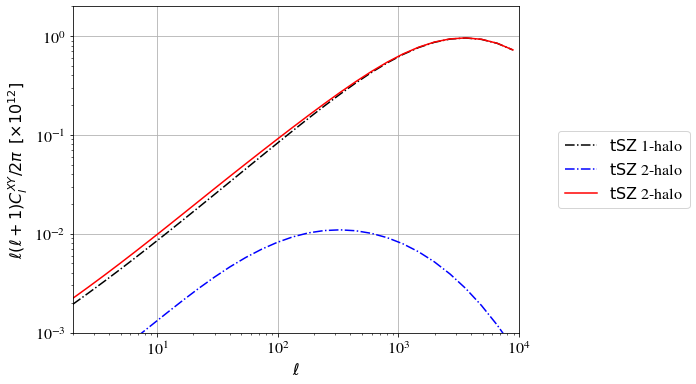

In [5]:
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,10000])
plt.ylim([1.e-3,2])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{12}]$")
plt.grid()
#

plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h']),'k-.',label=r'$\mathrm{tSZ}$ 1-halo')
plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['2h']),'b-.',label=r'$\mathrm{tSZ}$ 2-halo')
plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']),'r-',label=r'$\mathrm{tSZ}$ 2-halo')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

loop over M_min:

In [6]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.53, #hydrostatic equilibrium bias (1-b)^-1
       'hm_consistency':0 #deactivate counter terms since we want to cut the mass integral at low m
        })
# loop over M_min:
M_min_arr = np.geomspace(1e13,1e15,15)
cl_tot_arr = []
for mm in M_min_arr:
    M.set({'M_min':mm})
    M.compute()
    cl_sz = M.cl_sz()
    cl_tot_arr.append(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))
    ells = np.asarray(cl_sz['ell'])
M.struct_cleanup()
M.empty()   
    
    

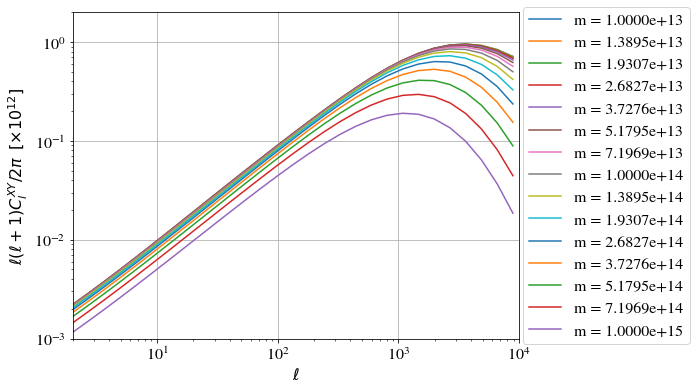

In [7]:
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,10000])
plt.ylim([1.e-3,2e0])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{12}]$")
plt.grid()
#
for (i,mm) in enumerate(M_min_arr):
    plt.loglog(ells,cl_tot_arr[i],label=r'm = %.4e'%mm)

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

# tsz power spectrum - Battaglia et al 2012

In [8]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15
        })
        
M.compute()
cl_sz = M.cl_sz()
M.struct_cleanup()
M.empty()

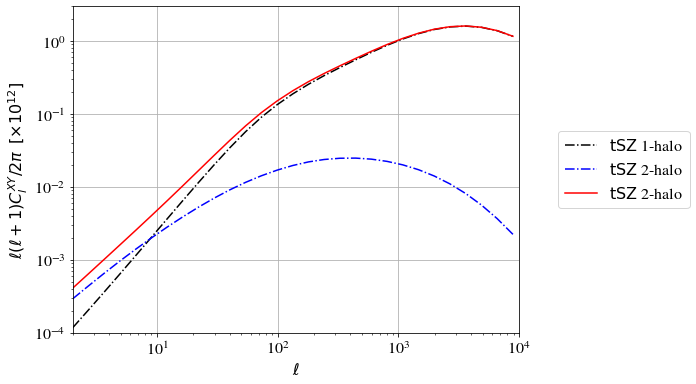

In [9]:
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,10000])
plt.ylim([1.e-4,3])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{12}]$")
plt.grid()
#

plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h']),'k-.',label=r'$\mathrm{tSZ}$ 1-halo')
plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['2h']),'b-.',label=r'$\mathrm{tSZ}$ 2-halo')
plt.loglog(np.asarray(cl_sz['ell']),np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']),'r-',label=r'$\mathrm{tSZ}$ 2-halo')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

loop over M_min:

In [10]:
M = Class()
M.set(common_settings)
M.set({# class_sz parameters:
       'output':'tSZ_1h,tSZ_2h',
       'pressure profile': 'B12',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'B13',  # B13: Bhattacharya et al 2013  
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-8,
       'z_max': 4.,
       'M_min':1e10, # all masses in Msun/h
       'M_max':5e15,
       'hm_consistency':0 #deactivate counter terms since we want to cut the mass integral at low m
        })
# loop over M_min:
M_min_arr = np.geomspace(1e13,1e15,15)
cl_tot_arr = []
for mm in M_min_arr:
    M.set({'M_min':mm})
    M.compute()
    cl_sz = M.cl_sz()
    cl_tot_arr.append(np.asarray(cl_sz['1h'])+np.asarray(cl_sz['2h']))
    ells = np.asarray(cl_sz['ell'])
M.struct_cleanup()
M.empty()   
    
    

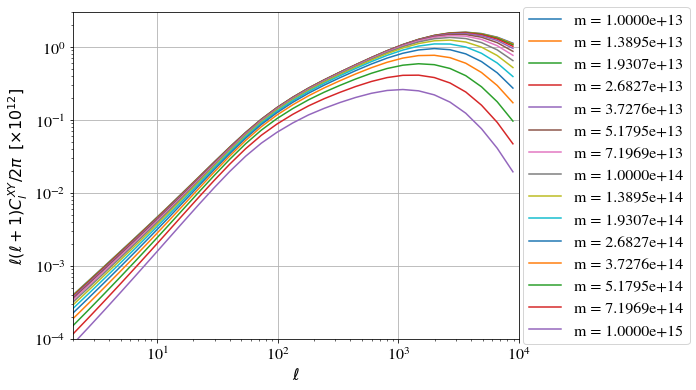

In [11]:
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,10000])
plt.ylim([1.e-4,3e0])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{12}]$")
plt.grid()
#
for (i,mm) in enumerate(M_min_arr):
    plt.loglog(ells,cl_tot_arr[i],label=r'm = %.4e'%mm)

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))